In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats

In [2]:
def my_xcorr(x, y):
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

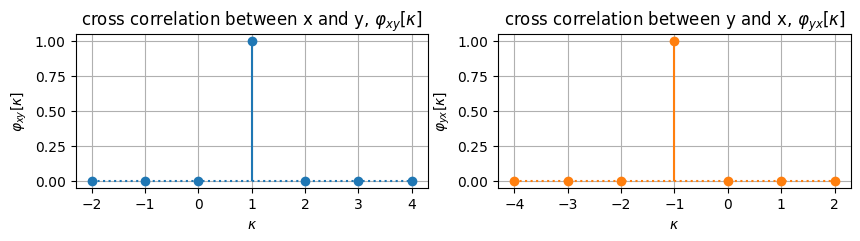

In [3]:
if True:  # test my_xcorr with simple example
    x = np.array([0, 1, 0, 0, 0])
    y = np.array([1, 0, 0])
    # plot my_xcorr(x, y) vs. my_xcorr(y, x)
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    kappa_xy, ccf_xy = my_xcorr(x, y)
    plt.stem(kappa_xy, ccf_xy,
             basefmt='C0:',
             linefmt='C0',
             markerfmt='C0o')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{xy}[\kappa]$')
    plt.title(r'cross correlation between x and y, $\varphi_{xy}[\kappa]$')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    kappa_yx, ccf_yx = my_xcorr(y, x)
    plt.stem(kappa_yx, ccf_yx,
             basefmt='C1:',
             linefmt='C1',
             markerfmt='C1o')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{yx}[\kappa]$')
    plt.title(r'cross correlation between y and x, $\varphi_{yx}[\kappa]$')
    plt.grid(True)

ideal   ensemble average: mu =  5.00, mu^2 = 25.00, sigma^2 =  9.00, mu^2 + sigma^2 = 34.00
numeric ensemble average: mu =  4.74, mu^2 = 22.46, sigma^2 =  9.14, mu^2 + sigma^2 = 31.60
ideal sigma =  3.00, numeric sigma =  3.02


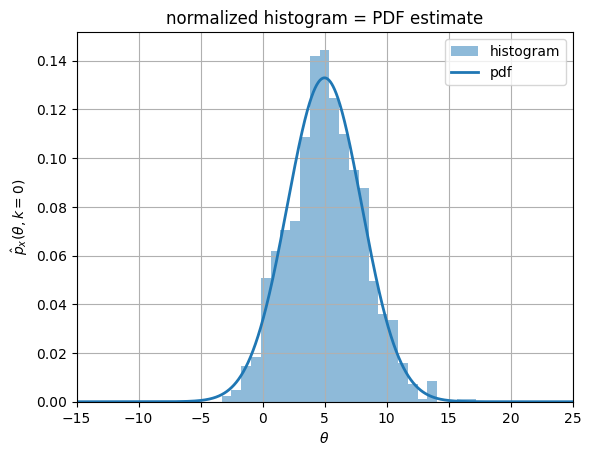

In [4]:
# set seed for reproducible results
seed = 1234
stats.norm.random_state = Generator(PCG64(seed))

# create random process based on normal distribution
Ns = 2**10  # number of sample functions for e.g. time instance k=0
loc, scale = 5, 3  # mu, sigma

theta = np.arange(-15, 25, 0.01)  # amplitudes for plotting PDF
# random process object with normal PDF
rv = stats.norm(loc=loc, scale=scale)
# get random data from sample functions
x = stats.norm.rvs(loc=loc, scale=scale, size=Ns)

# plot
fig, ax = plt.subplots(1, 1)
hist_estimate = ax.hist(x, bins='auto', density=True, histtype='bar',
                        color='C0', alpha=0.5, label='histogram')
ax.plot(theta, rv.pdf(theta), 'C0-', lw=2, label='pdf')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{p}_x(\theta,k=0)$')
ax.set_title('normalized histogram = PDF estimate')
ax.set_xlim(-15, 25)
ax.legend()
ax.grid(True)

# get histogram data from ax.hist()
edges = hist_estimate[1]
freq = hist_estimate[0]

# simple ensemble averages by numeric integration
# over histogram data as a simple estimate of the pdf
theta_num = edges[:-1]
dtheta = np.diff(edges)
mu = np.sum(theta_num * freq * dtheta)  # mu estimate
qm = np.sum(theta_num**2 * freq * dtheta)  # quadratic mean estimate
sig2 = np.sum((theta_num-mu)**2 * freq * dtheta)  # sigma^2 estimate
print('ideal   ensemble average: mu = %5.2f, mu^2 = %5.2f, sigma^2 = %5.2f, mu^2 + sigma^2 = %5.2f' %
      (loc, loc**2, scale**2, loc**2+scale**2))
print('numeric ensemble average: mu = %5.2f, mu^2 = %5.2f, sigma^2 = %5.2f, mu^2 + sigma^2 = %5.2f' %
      (mu, mu**2, sig2, qm))
print('ideal sigma = %5.2f, numeric sigma = %5.2f' % (scale, np.sqrt(sig2)))

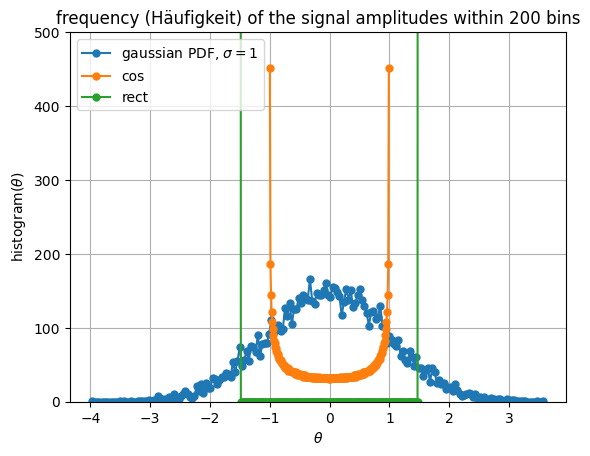

In [5]:
bins = 200

Ns = 10000  # number of sample function
Nt = 1  # number of time steps per sample function

# normal pdf
x = np.random.normal(loc=0, scale=1, size=[Ns, 1])
pdf, edges = np.histogram(x[:, 0], bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label=r'gaussian PDF, $\sigma=1$')

# cosine signal with peak amplitude 1
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
pdf, edges = np.histogram(x, bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='cos')

# rect signal with amplitude 1.5
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
x[x >= 0] = +1.5
x[x < 0] = -1.5
pdf, edges = np.histogram(x, bins=bins, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='rect')

plt.ylim(0, 500)
plt.xlabel(r'$\theta$')
plt.ylabel(r'histogram($\theta$)')
plt.title('frequency (Häufigkeit) of the signal amplitudes within 200 bins')
plt.legend()
plt.grid(True)

In [6]:
# create two random processes based on normal distribution
Ns = 2**10  # number of sample functions at certain time instant k
Nt = 1  # number of time steps per sample function
np.random.seed(1)

# 1st process:
locx, scalex = 1, 3
x = np.random.normal(loc=locx, scale=scalex, size=[Ns, Nt])

# 2nd process:
locy, scaley = 2, 4
y = np.random.normal(loc=locy, scale=scaley, size=[Ns, Nt])

In [7]:
crosspower = np.mean(x * y)
covariance = np.mean((x-np.mean(x)) * (y-np.mean(y)))
rho = np.mean((x-np.mean(x))/np.std(x) * (y-np.mean(y))/np.std(y))
print('crosspower = %4.3f, covariance = %4.3f,  correlation coefficient rho = %4.3f' %
      (crosspower, covariance, rho))

crosspower = 2.048, covariance = -0.256,  correlation coefficient rho = -0.021


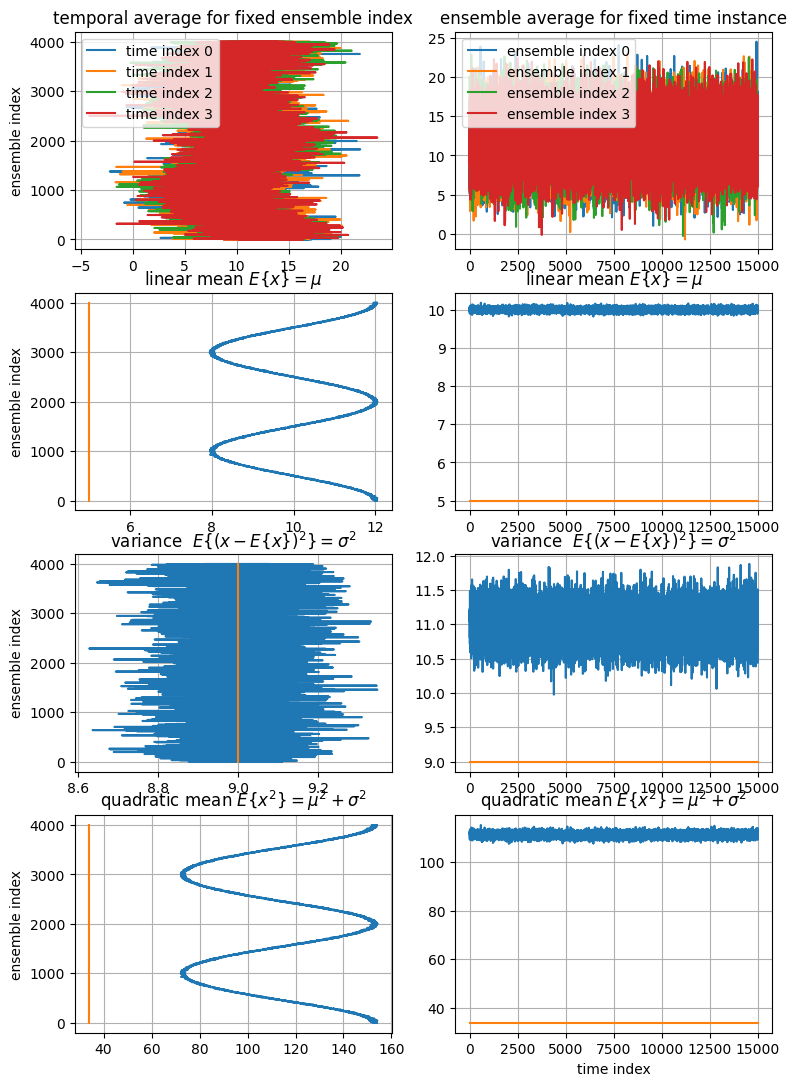

In [8]:
# create random process based on normal distribution
Ns = 4000  # number of samples to set up an ensemble
Nt = 15000  # number of time steps to set up 'ensemble over time'-characteristics
np.random.seed(1)

s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

loc, scale = 5, 3  # mu, sigma
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

# we check the three cases:
# 1. simulate an ergodic process, i.e. ensemble average == temporal average
case_str = 'x'
# 2./3. very simple simulation of non-stationary process by changing the mean
case_str = 'cos_s'  # add cosine over ensemble equally for all time instances
# case_str = 'cos_t'  # add cosine over time equally for all ensembles

if case_str == 'x':  # use x directly == ergodic process
    tmp = 1  # dummy variable since nothing to do here
elif case_str == 'cos_s':  # add cosine over ensemble equally for all time instances
    tmp = 2*np.cos(2 * 2*np.pi/Ns * np.arange(0, Ns)) + 5
    x = x + np.transpose(np.tile(tmp, (Nt, 1)))
elif case_str == 'cos_t':  # add cosine over time equally for all ensembles
    tmp = 2*np.cos(2 * 2*np.pi/Nt * np.arange(0, Nt)) + 5
    x = x + np.tile(tmp, (Ns, 1))

fig, axs = plt.subplots(4, 2, figsize=(9, 13))
# plot signals
for i in range(4):
    axs[0, 0].plot(x[:, i], s, label='time index '+str(i))
    axs[0, 1].plot(t, x[i, :], label='ensemble index '+str(i))
# plot means
axs[1, 0].plot(np.mean(x, axis=1), s)
axs[1, 1].plot(t, np.mean(x, axis=0))
axs[1, 0].plot([loc, loc], [0, Ns])
axs[1, 1].plot([0, Nt], [loc, loc])
# plot variance
axs[2, 0].plot(np.var(x, axis=1), s)
axs[2, 1].plot(t, np.var(x, axis=0))
axs[2, 0].plot([scale**2, scale**2], [0, Ns])
axs[2, 1].plot([0, Nt], [scale**2, scale**2])
# plot quadratic mean
axs[3, 0].plot(np.mean(x**2, axis=1), s)
axs[3, 1].plot(t, np.mean(x**2, axis=0))
axs[3, 0].plot([loc**2+scale**2, loc**2+scale**2], [0, Ns])
axs[3, 1].plot([0, Nt], [loc**2+scale**2, loc**2+scale**2])
# labeling
axs[3, 1].set_xlabel('time index')
for i in range(4):
    #axs[i,1].set_xlabel('time index')
    axs[i, 0].set_ylabel('ensemble index')
    for j in range(2):
        axs[i, j].grid(True)
axs[0, 0].set_title(r'temporal average for fixed ensemble index')
axs[0, 1].set_title(r'ensemble average for fixed time instance')
for i in range(2):
    axs[0, i].legend(loc='upper left')
    axs[1, i].set_title(r'linear mean $E\{x\} = \mu$')
    axs[2, i].set_title(r'variance  $E\{(x -E\{x\} )^2\} = \sigma^2$')
    axs[3, i].set_title(r'quadratic mean $E\{x^2\} = \mu^2+\sigma^2$')

In [9]:
# create two random processes based on normal distribution
Ns = 1  # number of sample functions at certain time instant k
Nt = 2**7  # number of time steps per sample function
np.random.seed(1)

# 1st process:
locx, scalex = 1, 3
x = np.random.normal(loc=locx, scale=scalex, size=[Ns, Nt])

# 2nd process:
locy, scaley = 2, 4
y = np.random.normal(loc=locy, scale=scaley, size=[Ns, Nt])

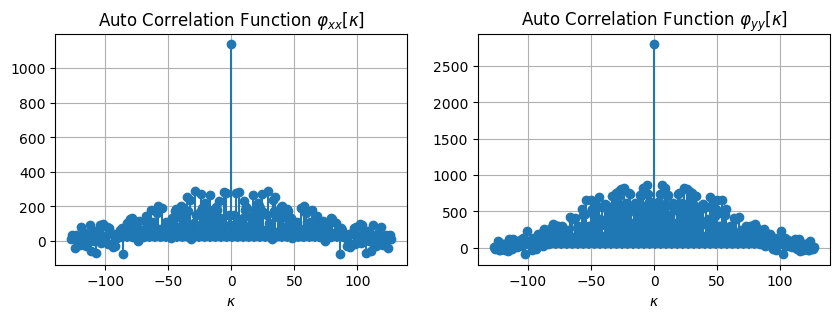

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{yy}[\kappa]$')
plt.grid(True)

# check the axial symmetry, why is the peak always at kappa=0

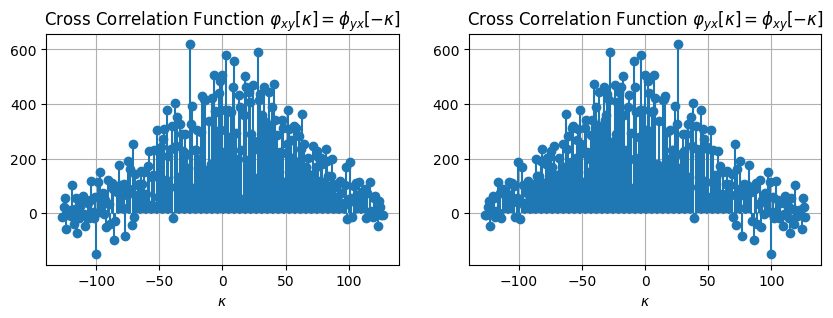

In [11]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(
    r'Cross Correlation Function $\varphi_{xy}[\kappa]=\phi_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(
    r'Cross Correlation Function $\varphi_{yx}[\kappa]=\phi_{xy}[-\kappa]$')
plt.grid(True)

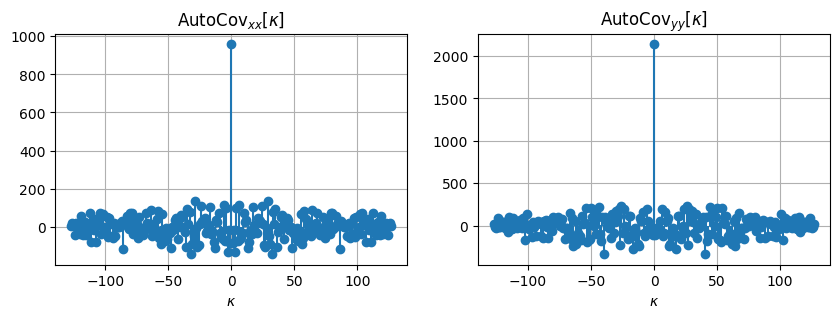

In [12]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'AutoCov$_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'AutoCov$_{yy}[\kappa]$')
plt.grid(True)

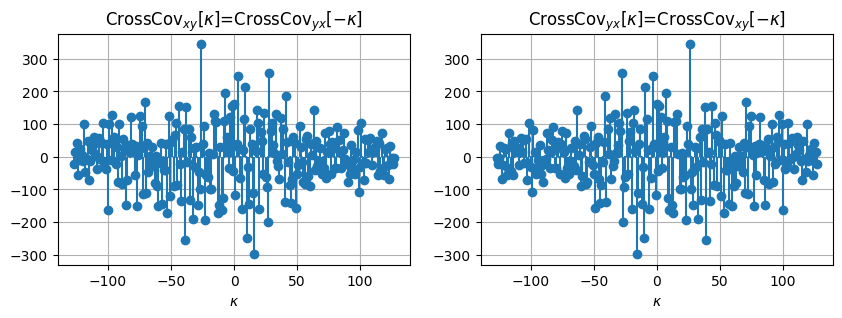

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'CrossCov$_{xy}[\kappa]$=CrossCov$_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.title(r'CrossCov$_{yx}[\kappa]$=CrossCov$_{xy}[-\kappa]$')
plt.grid(True)